### Predicting fuel Efficiency of a Car
##### Steps : 
1. Data Collection <br/> <t/>Source :`http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/`
2. Define Problem Statement
3. EDA
4. Data Preparation
5. Selecting and training Models
6. Hyperparameter Tuning
7. Deploy

###### Data Collection :
`!wget` to run bash command to get files from the UCI link

In [6]:
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

--2021-01-20 21:24:06--  http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30286 (30K) [application/x-httpd-php]
Saving to: 'auto-mpg.data.1'

     0K .......... .......... .........                       100% 99.6K=0.3s

2021-01-20 21:24:06 (99.6 KB/s) - 'auto-mpg.data.1' saved [30286/30286]



In [1]:
#Import Libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the .data file using pandas

cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
df = pd.read_csv('./auto-mpg.data',names=cols, na_values = "?",comment = '\t',sep= " ",skipinitialspace=True)

In [3]:
data = df.copy()
data.sample(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
111,18.0,3,70.0,90.0,2124.0,13.5,73,3
232,16.0,8,351.0,149.0,4335.0,14.5,77,1
172,25.0,4,90.0,71.0,2223.0,16.5,75,2
315,24.3,4,151.0,90.0,3003.0,20.1,80,1
167,29.0,4,97.0,75.0,2171.0,16.0,75,3
31,25.0,4,113.0,95.0,2228.0,14.0,71,3
120,19.0,4,121.0,112.0,2868.0,15.5,73,2
74,13.0,8,302.0,140.0,4294.0,16.0,72,1
161,16.0,6,250.0,105.0,3897.0,18.5,75,1
166,13.0,8,302.0,129.0,3169.0,12.0,75,1


##### Problem Statement:
The data contains MPG variable which is continuous data and tells us about the efficiency of fuel consumption of a vehicle in 70s and 80s.

Our aim here is to predict the MPG value for a vehicle given we have other attributes of that vehicle.

##### Exploratory Data Analysis
- Check for Data type of columns
- Check for null values.
- Check for outliers
- Look for the category distribution in categorical columns
- Plot for correlation
- Look for new variables

In [4]:
#Check for Data type of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [5]:
#to see the summery of the statistics of the dataframae
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
data.shape

(398, 8)

In [7]:
#Check for null values.
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

so there is null values in the dataframe in `Horsepower`

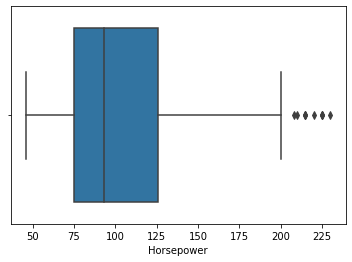

In [8]:
# Check for outliers for the missing data
sns.boxplot(data.Horsepower)

there are a small number of outlers so we will fill the values with their median values 

In [9]:
median = data.Horsepower.median()
data.Horsepower = data.Horsepower.fillna(median)

In [10]:
print(data.isnull().sum())
data.head()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [11]:
# Now  check categorical values
print(data.Cylinders.value_counts())
print(100*data.Cylinders.value_counts()/len(data))


4    204
8    103
6     84
3      4
5      3
Name: Cylinders, dtype: int64
4    51.256281
8    25.879397
6    21.105528
3     1.005025
5     0.753769
Name: Cylinders, dtype: float64


In [12]:
print(data.Origin.value_counts())
print(100*data.Origin.value_counts()/len(data))


1    249
3     79
2     70
Name: Origin, dtype: int64
1    62.562814
3    19.849246
2    17.587940
Name: Origin, dtype: float64


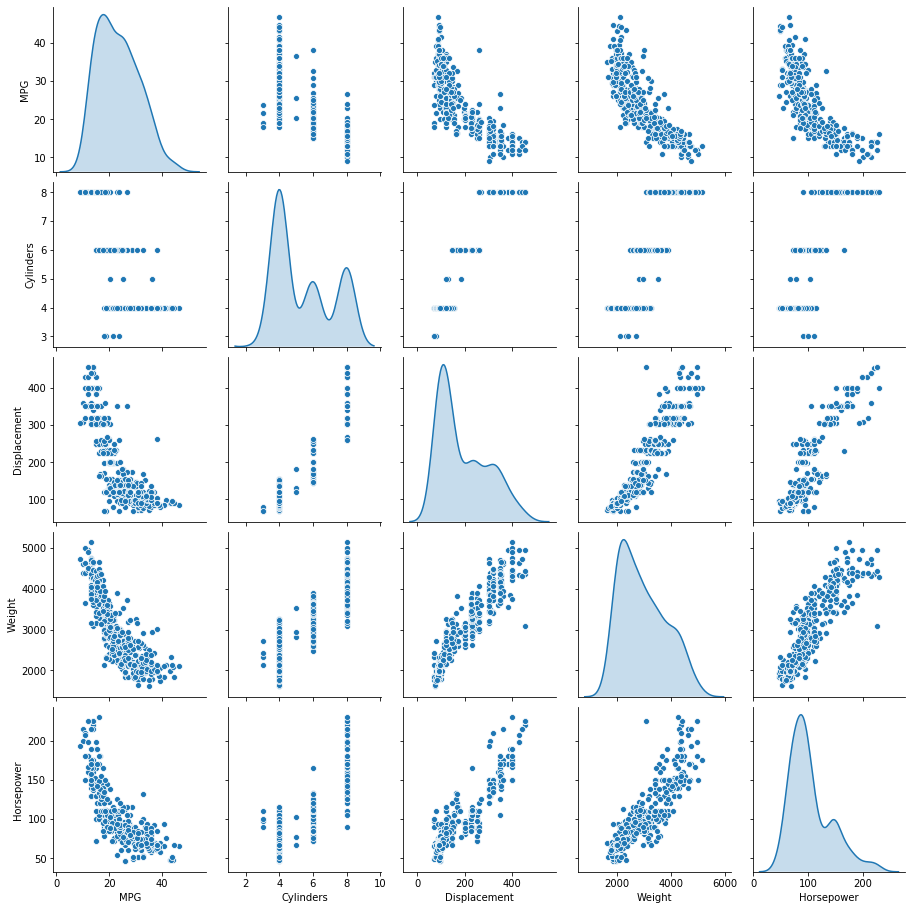

In [13]:
sns.pairplot(data[["MPG", "Cylinders", "Displacement", "Weight", "Horsepower"]], diag_kind="kde")

In [14]:
# set aside the test data
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

test_set.shape

(80, 8)

##### Data Preparation:
- Handleing Categorical values : OnehotEncoding
- Data Cleaning
- Attribute Addition
- Setting up transformation pipeline for Numerical and categorical column

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit


In [27]:
split = StratifiedShuffleSplit(n_splits=1 , test_size = .2 ,random_state=42)
for train_index , test_index in split.split(data,data.Cylinders):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
    #print(data.loc[test_index],' ',data.loc[train_index] )

##### Segrigating target and feature variables


In [30]:
data = strat_train_set.drop('MPG' ,axis = 1)
data_labels = strat_train_set['MPG'].copy()
data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,3
151,4,79.0,67.0,2000.0,16.0,74,2
388,4,156.0,92.0,2585.0,14.5,82,1
48,6,250.0,88.0,3139.0,14.5,71,1
114,4,98.0,90.0,2265.0,15.5,73,2


In [34]:
data.Origin = data.Origin.map({1:'India' , 2:'USA' , 3: 'Germany'} )
#data.head()

In [35]:
data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,Germany
151,4,79.0,67.0,2000.0,16.0,74,USA
388,4,156.0,92.0,2585.0,14.5,82,India
48,6,250.0,88.0,3139.0,14.5,71,India
114,4,98.0,90.0,2265.0,15.5,73,USA


In [40]:
#one hot encoding 
from sklearn.preprocessing import OneHotEncoder 
cat_df = data[['Origin']]


In [44]:
encoder = OneHotEncoder()
df_categorical = encoder.fit_transform(cat_df)
df_categorical

<318x3 sparse matrix of type '<class 'numpy.float64'>'
	with 318 stored elements in Compressed Sparse Row format>

In [46]:
# Now convert sperce matrix to array and viw top 5 lines
df_categorical.toarray()[:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [48]:
encoder.categories_

[array(['Germany', 'India', 'USA'], dtype=object)]

to deal with missing values with skearn.impute and using SimpleImputer . for that case we are making the copy of the values '

In [54]:
new_data = df.copy()

In [57]:
new_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [59]:
new_data_numarical = new_data.iloc[:,[2,3,4,5,6]]
new_data_numarical

,Displacement,Horsepower,Weight,Acceleration,Model Year
0,307.0,130.0,3504.0,12.0,70
1,350.0,165.0,3693.0,11.5,70
2,318.0,150.0,3436.0,11.0,70
3,304.0,150.0,3433.0,12.0,70
4,302.0,140.0,3449.0,10.5,70
...,...,...,...,...,...
393,140.0,86.0,2790.0,15.6,82
394,97.0,52.0,2130.0,24.6,82
395,135.0,84.0,2295.0,11.6,82
396,120.0,79.0,2625.0,18.6,82


In [60]:
new_data_numarical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Displacement  398 non-null    float64
 1   Horsepower    392 non-null    float64
 2   Weight        398 non-null    float64
 3   Acceleration  398 non-null    float64
 4   Model Year    398 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 15.7 KB


In [61]:
#check missing values
new_data_numarical.isnull().sum()

Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
dtype: int64

In [66]:
#now using SimpleImputer we are going to impute the missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [67]:
imputer.fit(new_data_numarical)


imputer.statistics_

array([ 148.5,   93.5, 2803.5,   15.5,   76. ])

In [68]:
new_data_numarical.isnull().sum()

Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
dtype: int64

In [70]:
new_data_numarical.median().values 

array([ 148.5,   93.5, 2803.5,   15.5,   76. ])

In [71]:
X = imputer.transform(new_data_numarical)
X

array([[ 307. ,  130. , 3504. ,   12. ,   70. ],
       [ 350. ,  165. , 3693. ,   11.5,   70. ],
       [ 318. ,  150. , 3436. ,   11. ,   70. ],
       ...,
       [ 135. ,   84. , 2295. ,   11.6,   82. ],
       [ 120. ,   79. , 2625. ,   18.6,   82. ],
       [ 119. ,   82. , 2720. ,   19.4,   82. ]])

In [72]:
New_updated_df = pd.DataFrame(X,columns=new_data_numarical.columns , index=new_data_numarical.index)
New_updated_df.head()

,Displacement,Horsepower,Weight,Acceleration,Model Year
0,307.0,130.0,3504.0,12.0,70.0
1,350.0,165.0,3693.0,11.5,70.0
2,318.0,150.0,3436.0,11.0,70.0
3,304.0,150.0,3433.0,12.0,70.0
4,302.0,140.0,3449.0,10.5,70.0


In [74]:
New_updated_df.isnull().sum()

Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
dtype: int64